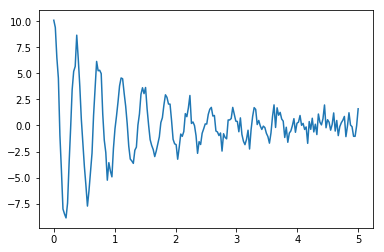

In [40]:
import numpy as np 
import matplotlib.pyplot as plt
datos = np.genfromtxt("resorte.dat")
datos_x=datos[:,1]
datos_tiempo=datos[:,0]
plt.figure()
plt.plot(datos_tiempo,datos_x)
plt.show()
plt.close()


##Importando y visualizando los datos
##Importing data

    



In [24]:
def yobs(a,gamma,omega,t): 
    return a*np.exp(-gamma*t)*np.cos(omega*t)

In [37]:
def chi2(a,gamma,omega):
    chi2=0
    for t in range(len(datos_tiempo)):
        chi2+=(datos_x[t]-yobs(a,gamma,omega,datos_tiempo[t]))**2
        
    return chi2
        
## function to determine if we are not improving with every step
    
    

In [26]:
def L(chi2):
    return np.exp((-1/2)*chi2)

In [27]:

##Random walk


def distri(pasos,sigma):
    #Initial values
    aini=7.5
    gammaini=0.6
    omegaini=18.2
    
    total=[]
    a_arr=[]
    gamma_arr=[]
    omega_arr=[]
    L_arr=[]
    
    #Where with keep the best choices
    a_mejor=0
    gamma_mejor=0
    omega_mejor=0
    
    
    a_arr.append(aini)
    gamma_arr.append(gammaini)
    omega_arr.append(omegaini)
    L_arr.append(L(chi2(aini,gammaini,omegaini)))
    
    
    #Walk
    i=0
    while (i<pasos):
        
        x=a_arr[i]+np.random.normal()*sigma
        y=gamma_arr[i]+np.random.normal()*sigma
        z=omega_arr[i]+np.random.normal()*sigma
        
        chi=chi2(x,y,z)
        L_nuevo=L(chi)
        lam=L_nuevo/L_arr[i]
        
        if(lam>=1):
            a_arr.append(x)
            gamma_arr.append(y)
            omega_arr.append(z)
            L_arr.append(L_nuevo)
            
            a_mejor=x
            gamma_mejor=y
            omega_mejor=z

        else:
            beta=np.random.random()
            if(lam>=beta):
                a_arr.append(x)
                gamma_arr.append(y)
                omega_arr.append(z)
                L_arr.append(L_nuevo)
                
                a_mejor=x
                gamma_mejor=y
                omega_mejor=z
                
            else:
                a_arr.append(a_arr[i])
                gamma_arr.append(gamma_arr[i])
                omega_arr.append(omega_arr[i])
                L_arr.append(L_arr[i])
            
        i+=1
        
    total.append(a_mejor)
    total.append(gamma_mejor)
    total.append(omega_mejor)
    
    return total

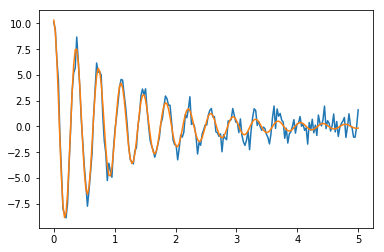

LOS MEJORES PARAMETROS SON a=10.31124597655594 gamma=0.811908902772374 y omega=17.04688839375938


In [41]:
x=distri(10000,2)
x_nuevo=[]


for h in range(len(datos_tiempo)):
    x_nuevo.append(yobs(x[0],x[1],x[2],datos_tiempo[h]))
    
plt.figure()
plt.plot(datos_tiempo,datos_x)
plt.plot(datos_tiempo,x_nuevo)
plt.savefig('Resorte.pdf')
plt.show()
plt.close()

print("LOS MEJORES PARAMETROS SON a="+str(x[0])+" gamma="+str(x[1])+" y omega="+str(x[2]))
    